# USA Vehicle sales analysis



***It is a vehicle sales data of different different companies and according to some unique features which we are going to be anylize to see insights of this data and make some fruitfull outcome of it to understand whole data easily.***

## 00 Downloading the Dataset

**TODO** - Here i have downloaded a dataset of automobile sales from the kaggle

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\vehicle-sales-data" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './vehicle-sales-data'

In [ ]:
import os
os.listdir(data_dir)

['car_prices.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "vehicle_sales_data" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shalinvachheta42/vehicle-sales-data" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/shalinvachheta42/vehicle-sales-data


'https://jovian.com/shalinvachheta42/vehicle-sales-data'

## 01 Data Preparation and Cleaning

**TODO** - Doing some bvasic Data preparations for further analysis and also filled NaN values and got basic maths values of int columns



In [ ]:
import pandas as pd
car_price =pd.read_csv('car_prices.csv')

In [ ]:
car_price.shape

(558837, 16)

558837 Rows,

16 Columns

In [ ]:
# Display the first few rows of the DataFrame
car_price.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
# Explore the structure of the dataset
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
data_types = car_price.dtypes
num_string_columns = data_types[data_types == 'object'].count()
num_numeric_columns = data_types[(data_types == 'int64') | (data_types == 'float64')].count()

print("Number of columns with string values:", num_string_columns)
print("Number of columns with integer/float values:", num_numeric_columns)

Number of columns with string values: 11
Number of columns with integer/float values: 5


In [ ]:
# Check for missing valaues
car_price.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
# filling NaNs values accorind to thier Avg values
integer_columns = car_price.select_dtypes(include='int64').columns
string_columns = car_price.select_dtypes(include='object').columns

# Calculate the mean of integer columns
int_column_means = car_price[integer_columns].mean()

# Fill NaN values in integer columns with the mean of each column
car_price[integer_columns] = car_price[integer_columns].fillna(int_column_means)

# Calculate the mode of string columns
str_column_modes = car_price[string_columns].mode().iloc[0]

# Fill NaN values in string columns with the mode of each column
car_price[string_columns] = car_price[string_columns].fillna(str_column_modes)

In [ ]:
# Check for missing values
car_price.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11820
odometer           94
color               0
interior            0
seller              0
mmr                38
sellingprice       12
saledate            0
dtype: int64

In [ ]:
car_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


###### Now we remove some rops as we cant procees with some NAN values

In [ ]:
car_price.dropna(inplace=True)

In [ ]:
car_price.shape

(546976, 16)

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shalinvachheta42/vehicle-sales-data" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/shalinvachheta42/vehicle-sales-data


'https://jovian.com/shalinvachheta42/vehicle-sales-data'

## 02 Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Convert 'saledate' column to datetime format with utc=True
car_price['saledate'] = pd.to_datetime(car_price['saledate'], format='mixed', utc=True)

# Verify the conversion
print(car_price['saledate'])

0        2014-12-16 04:30:00+00:00
1        2014-12-16 04:30:00+00:00
2        2015-01-14 20:30:00+00:00
3        2015-01-28 20:30:00+00:00
4        2014-12-18 04:30:00+00:00
                    ...           
558832   2015-07-09 00:00:00+00:00
558833   2015-07-08 02:30:00+00:00
558834   2015-07-08 02:30:00+00:00
558835   2015-07-08 23:45:00+00:00
558836   2015-05-27 22:30:00+00:00
Name: saledate, Length: 546976, dtype: datetime64[ns, UTC]


In [ ]:
car_price.describe()

,year,condition,odometer,mmr,sellingprice
count,546976.000000,546976.000000,546976.000000,546976.000000,546976.000000
mean,2010.134238,30.673048,67263.263145,13915.703568,13764.427622
std,3.906362,13.402735,52793.563329,9674.425359,9747.827994
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,23.000000,28050.000000,7375.000000,7100.000000
50%,2012.000000,35.000000,51223.000000,12400.000000,12300.000000
75%,2013.000000,42.000000,97393.000000,18450.000000,18300.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**TODO**


####  Lets get an idea in which year how many cars are sold

In [ ]:
car_price['sale_year'] = pd.to_datetime(car_price['saledate']).dt.year

In [ ]:
cars_sold_per_year = car_price['year'].value_counts().sort_index()

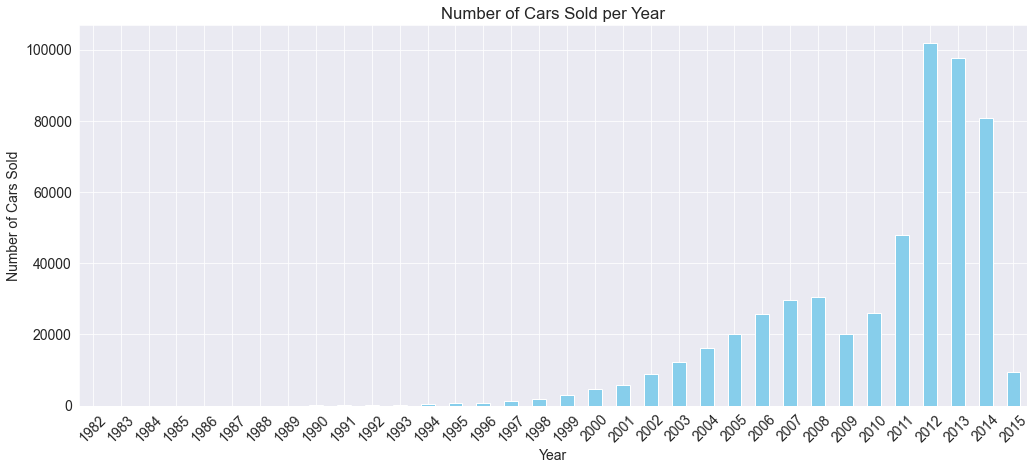

In [ ]:
# Visualize the result using a bar chart
plt.figure(figsize=(17, 7))
cars_sold_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Sold per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

***here it is a noticeable increase in car sales starting around 2010, suggesting a period of significant growth in the automotive industry.***

***The sharp rise in sales after 2010 could be due to various factors such as economic recovery, technological advancements, or changes in consumer preferences.***

**TODO**- lets see which state in USA sales how many cars over the time per brand and per state

Total cars by state and brand:
state  make      
ab     Acura          1
       Audi           2
       BMW            7
       Buick          4
       Cadillac       8
                     ..
wi     oldsmobile     2
       pontiac        1
       smart         11
       subaru         1
       toyota         2
Length: 1962, dtype: int64


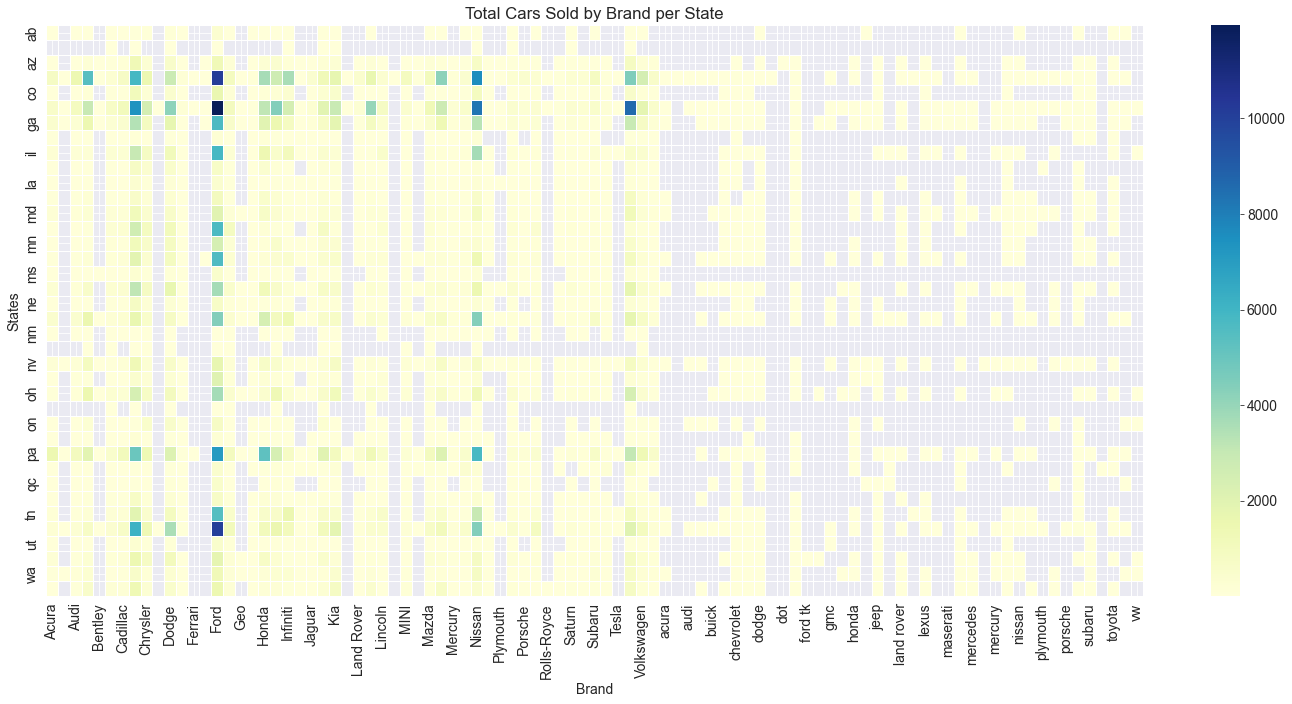

In [ ]:

# Group the DataFrame by state and brand, and calculate the total count of cars
total_cars_by_state_brand = car_price.groupby(['state', 'make']).size()

# Print the total count of cars by state and brand
print("Total cars by state and brand:")
print(total_cars_by_state_brand)

# Convert the Series to a DataFrame and reset index to flatten the multi-index
total_cars_by_state_brand = total_cars_by_state_brand.reset_index(name='count')

# Pivot the DataFrame to prepare it for heatmap
heatmap_data = total_cars_by_state_brand.pivot(index='state', columns='make', values='count')

# Plot a heatmap for total count of cars sold by brand per state
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5)
plt.title('Total Cars Sold by Brand per State')
plt.xlabel('Brand')
plt.ylabel('States')
plt.tight_layout()
plt.show()

### NOW per state

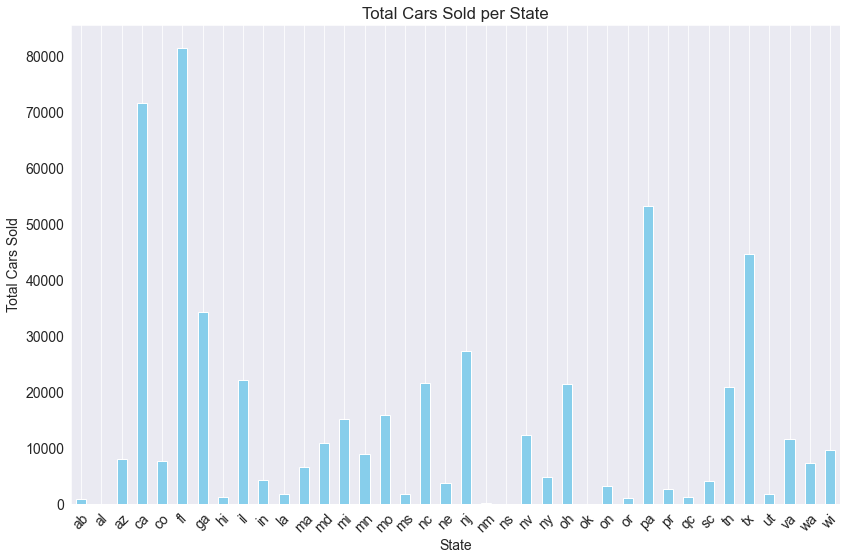

In [ ]:
# Assuming you have a DataFrame named 'car_price' containing the car sales data

# Group the DataFrame by state and calculate the total count of cars sold per state
total_cars_by_states = car_price.groupby('state').size()

# Plot a bar chart for total cars sold per state
plt.figure(figsize=(12, 8))
total_cars_by_states.plot(kind='bar', color='skyblue')
plt.title('Total Cars Sold per State')
plt.xlabel('State')
plt.ylabel('Total Cars Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**TODO** - lets have a idea of odometer range  as we can knopw how many miles car ran till end

In [ ]:
# Define the bin edges for the odometer ranges
bin_edges = [0, 5000, 10000, 15000, 20000, float('inf')]

# Define labels for the ranges
bin_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k+']

# Create a new column 'odometer_range' to store the range labels
car_price['odometer_range'] = pd.cut(car_price['odometer'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new 'odometer_range' column
print(car_price[['odometer', 'odometer_range']])

        odometer odometer_range
0        16639.0        15k-20k
1         9393.0         5k-10k
2         1331.0           0-5k
3        14282.0        10k-15k
4         2641.0           0-5k
...          ...            ...
558832   18255.0        15k-20k
558833   54393.0           20k+
558834   50561.0           20k+
558835   16658.0        15k-20k
558836   15008.0        15k-20k

[546976 rows x 2 columns]


In [ ]:
# Count the total number of cars in each odometer range
odometer_range_counts = car_price['odometer_range'].value_counts()

# Print the total number of cars in each odometer range
print("Total cars in each odometer range:")
print(odometer_range_counts)

Total cars in each odometer range:
odometer_range
20k+       463291
15k-20k     32224
10k-15k     25933
5k-10k      16680
0-5k         8848
Name: count, dtype: int64


**TODO** - top 15 most sold brand

In [ ]:
brand_counts = car_price['make'].value_counts()
print(brand_counts.head(15))

make
Ford             102307
Chevrolet         58866
Nissan            53132
Toyota            38999
Dodge             30112
Honda             26381
Hyundai           21479
BMW               20306
Kia               17869
Chrysler          16921
Mercedes-Benz     16786
Infiniti          15179
Jeep              15015
Volkswagen        12178
Lexus             11672
Name: count, dtype: int64


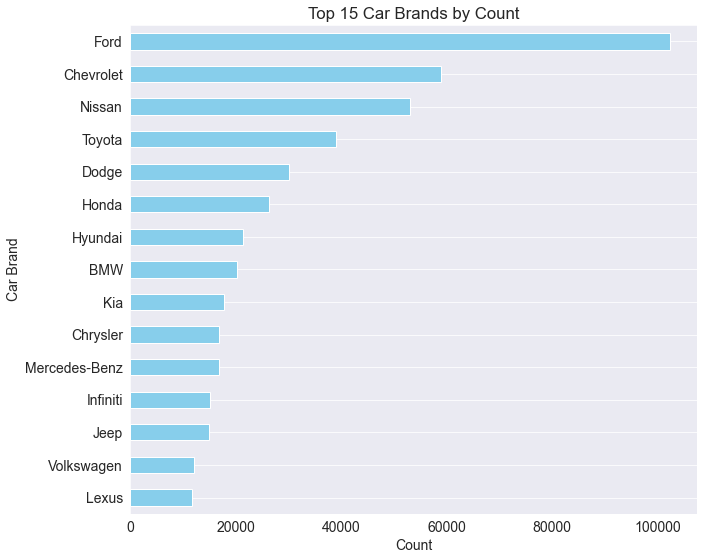

In [ ]:
top_15_brands = brand_counts.head(15)

# Plot a horizontal bar chart for the top 15 brands
plt.figure(figsize=(10, 8))
top_15_brands.plot(kind='barh', color='skyblue')
plt.title('Top 15 Car Brands by Count')
plt.xlabel('Count')
plt.ylabel('Car Brand')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent brand at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shalinvachheta42/vehicle-sales-data" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/shalinvachheta42/vehicle-sales-data


'https://jovian.com/shalinvachheta42/vehicle-sales-data'

## 03 Asking and Answering Questions

***TODO -let's undertsand some of most use ful featues via simple graph to under the insights of data***



#### Q1: TODO - lets know how many total interiors are thre ,most preffeables too

In [ ]:
unique_interiors = car_price['interior'].unique()
# Print the names of unique interior types
print("Unique interior types:")
i=1
for interior_type in unique_interiors:
    print(i,interior_type)
    i+=1

Unique interior types:
1 black
2 beige
3 tan
4 brown
5 gray
6 —
7 burgundy
8 white
9 silver
10 off-white
11 blue
12 red
13 yellow
14 green
15 purple
16 orange
17 gold


In [ ]:
# Count the occurrences of each interior type
interior_counts = car_price['interior'].value_counts()

# Find the interior with the highest count
most_preferred_interior = interior_counts.idxmax()

# Print the most preferred interior
print("Most preferred interior:", most_preferred_interior)


Most preferred interior: black


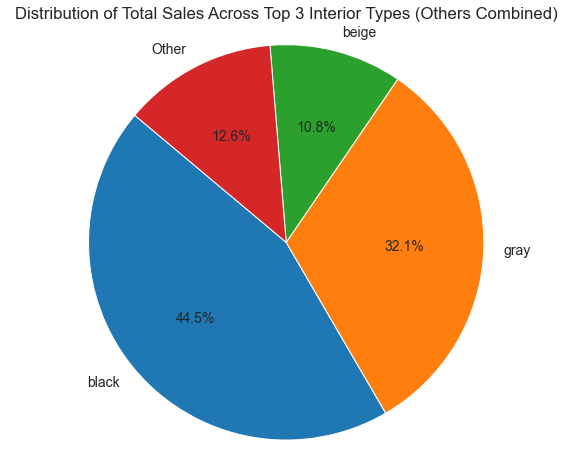

In [ ]:
# Group the DataFrame by interior type and calculate the total count of sales
total_sales_by_interior = car_price['interior'].value_counts()

# Combine the counts of the first 3 interiors and sum up the rest
top_3_interiors = total_sales_by_interior.head(3)
other_interiors_count = total_sales_by_interior[3:].sum()

# Create a new Series with the top 3 interiors and the combined count for the rest
top_interiors_combined = pd.Series({interior: count for interior, count in top_3_interiors.items()})
top_interiors_combined['Other'] = other_interiors_count

# Plot a pie chart
plt.figure(figsize=(10, 8))
top_interiors_combined.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Sales Across Top 3 Interior Types (Others Combined)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Q2: TODO -  Fav transmission type in sold cars

In [ ]:
# Count the occurrences of each transmission type
transmission_counts = car_price['transmission'].value_counts()
transmission_counts

transmission
automatic    529931
manual        17045
Name: count, dtype: int64

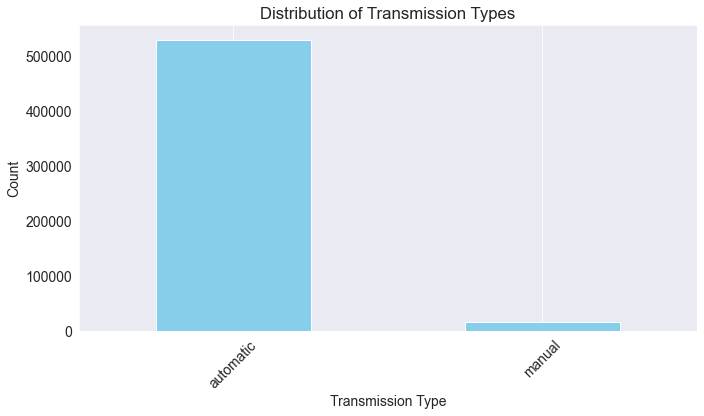

Most liked transmission type: automatic


In [ ]:
# Plot a bar chart for transmission types
plt.figure(figsize=(10, 6))
transmission_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Find the most liked transmission type
most_liked_transmission = transmission_counts.idxmax()
print("Most liked transmission type:", most_liked_transmission)

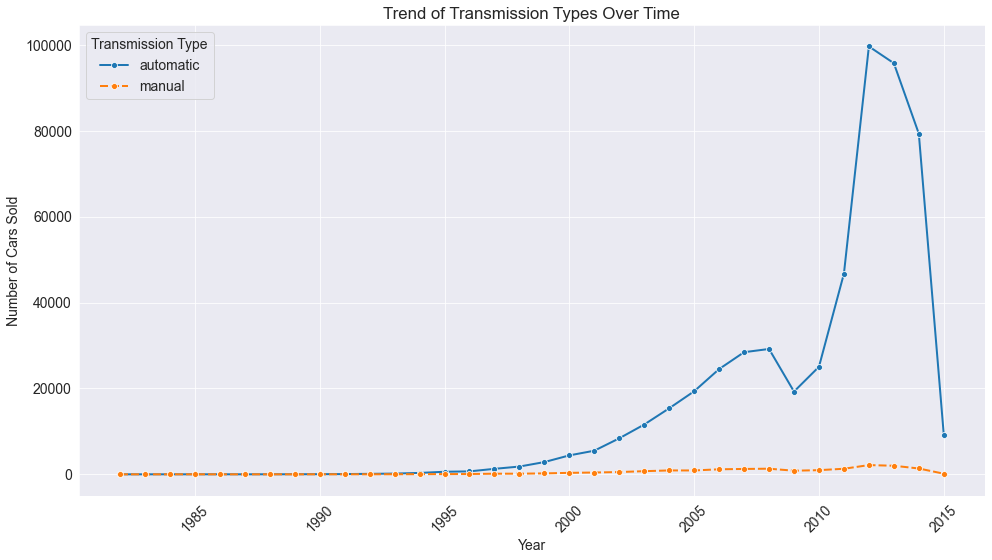

In [ ]:
# Group the data by year and transmission type, and count the occurrences
transmission_trend = car_price.groupby(['year', 'transmission']).size().unstack(fill_value=0)

# Plot the trend of transmission types over time
plt.figure(figsize=(14,8))
sns.lineplot(data=transmission_trend, marker='o', linewidth=2)
plt.title('Trend of Transmission Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total percentage of each transmission type
transmission_percentage = car_price['transmission'].value_counts(normalize=True) * 100
print("Total Percentage of Each Transmission Type:")
print(transmission_percentage)

Total Percentage of Each Transmission Type:
transmission
automatic    96.883776
manual        3.116224
Name: proportion, dtype: float64


#### Q3: TODO - Lets know which is most fav body types

C:\Users\Admin\AppData\Local\Temp\ipykernel_21920\1569584108.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_five_body_types.index, y=top_five_body_types.values, palette='viridis')


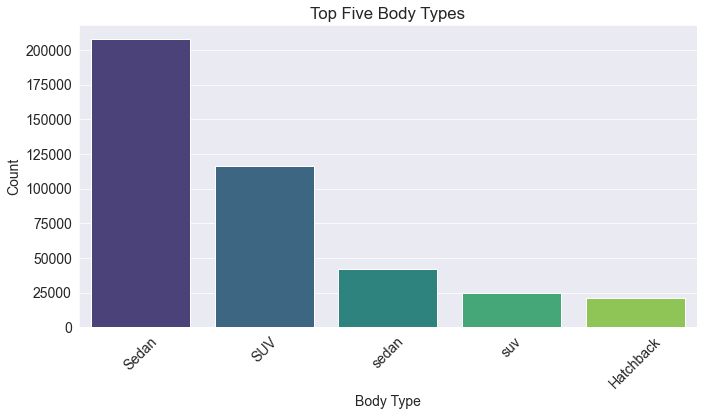

In [ ]:
# Count the occurrences of each body type
body_type_counts = car_price['body'].value_counts()

# Select the top five body types
top_five_body_types = body_type_counts.head(5)

# Plot a bar chart for the top five body types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_five_body_types.index, y=top_five_body_types.values, palette='viridis')
plt.title('Top Five Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Due to the typing issuies in data we got some same name many times

#### Q4: TODO - lets see avd selling price over ther time

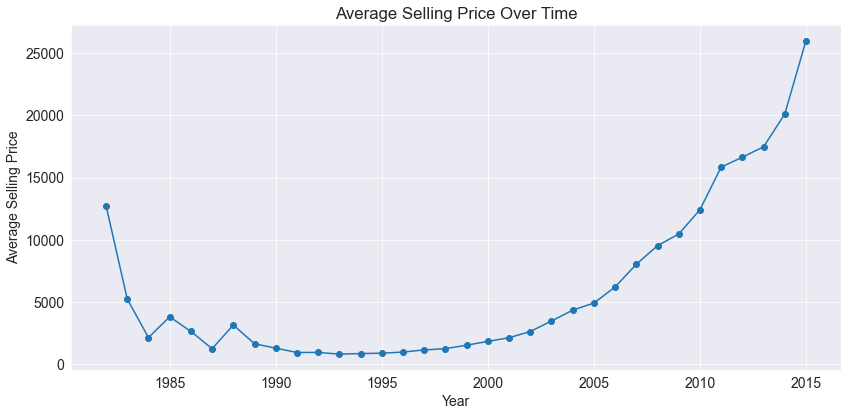

In [ ]:
# Group the data by year and calculate the average selling price for each year
selling_price_overtime = car_price.groupby('year')['sellingprice'].mean()

# Plot the average selling price over time
plt.figure(figsize=(12, 6))
plt.plot(selling_price_overtime.index, selling_price_overtime.values, marker='o')
plt.title('Average Selling Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()


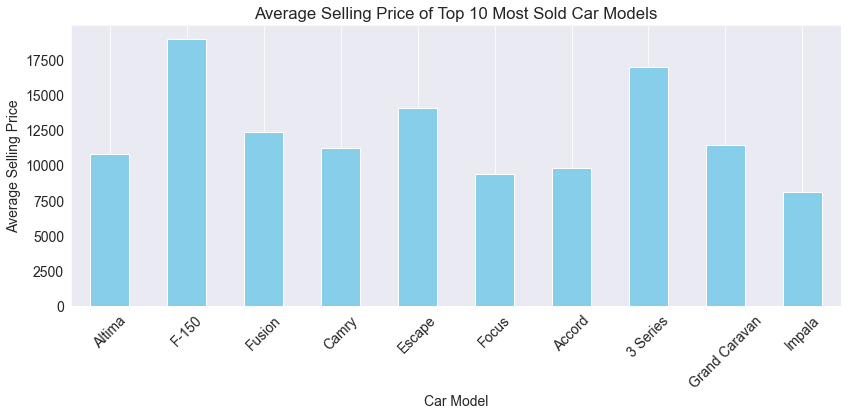

In [ ]:
# Calculate the total number of sales for each car model
total_sales_by_model = car_price['model'].value_counts()

# Select the top 10 car models with the highest number of sales
top_10_models = total_sales_by_model.nlargest(10)

# Calculate the average selling price for each of these top 10 car models
avg_selling_price_by_model = car_price.groupby('model')['sellingprice'].mean()
avg_selling_price_top_10 = avg_selling_price_by_model.loc[top_10_models.index]

# Plot a bar graph to visualize the average selling price of the top 10 most sold car models
plt.figure(figsize=(12, 6))
avg_selling_price_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price of Top 10 Most Sold Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

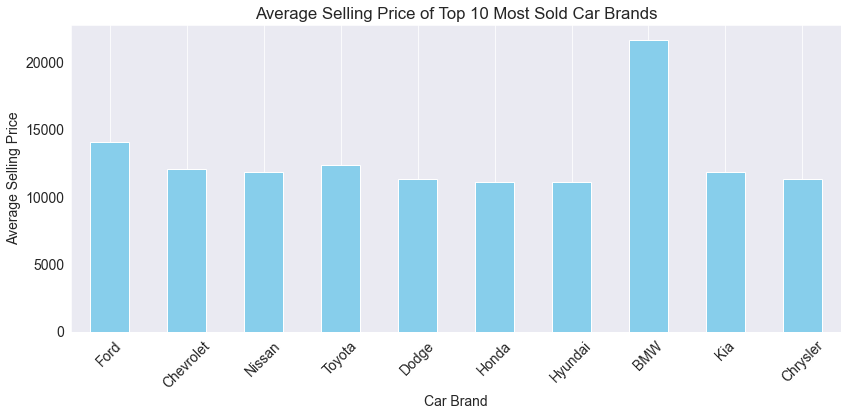

In [ ]:
# Calculate the total number of sales for each car brand
total_sales_by_brand = car_price['make'].value_counts()

# Select the top 10 car brands with the highest number of sales
top_10_brands = total_sales_by_brand.nlargest(10)

# Calculate the average selling price for each of these top 10 car brands
avg_selling_price_by_brand = car_price.groupby('make')['sellingprice'].mean()
avg_selling_price_top_10 = avg_selling_price_by_brand.loc[top_10_brands.index]

# Plot a bar graph to visualize the average selling price of the top 10 most sold car brands
plt.figure(figsize=(12, 6))
avg_selling_price_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price of Top 10 Most Sold Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Q5: TODO - Top Brand of all time

In [ ]:
# Group the DataFrame by brand and calculate the total count of sales
total_sales_by_brand = car_price['make'].value_counts()

In [ ]:
# Find the top 10 brands
top_10_brands = total_sales_by_brand.head(10)

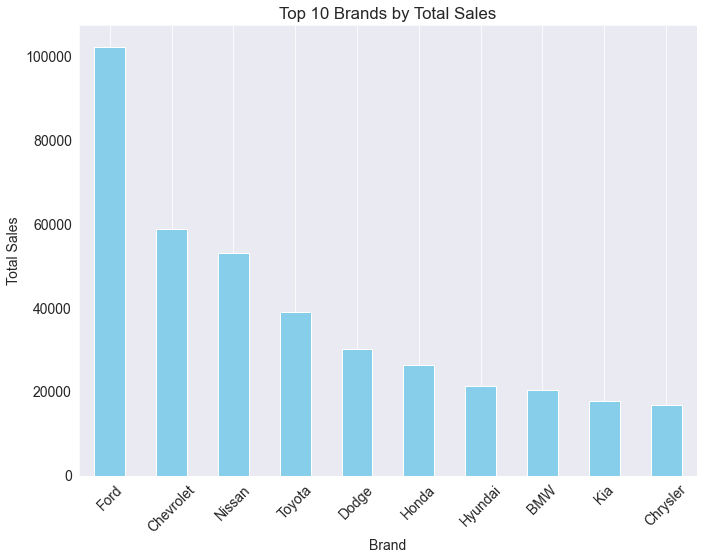

Top 10 brands for selling the highest number of vehicles:
make
Ford         102307
Chevrolet     58866
Nissan        53132
Toyota        38999
Dodge         30112
Honda         26381
Hyundai       21479
BMW           20306
Kia           17869
Chrysler      16921
Name: count, dtype: int64


In [ ]:
# Plot a bar chart for the top 10 brands
plt.figure(figsize=(10, 8))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands by Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Top 10 brands for selling the highest number of vehicles:")
print(top_10_brands)


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shalinvachheta42/vehicle-sales-data" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/shalinvachheta42/vehicle-sales-data


'https://jovian.com/shalinvachheta42/vehicle-sales-data'

## 04 Inferences and Conclusion



1. **Total Sales by Brand**: First, we calculate the total number of sales for each car brand. This gives us an understanding of which brands are the most popular among consumers.

2. **Top 10 Brands**: We identify the top 10 car brands with the highest number of sales. These are the brands that are most sought after by consumers.

3. **Average Selling Price by Brand**: Next, we calculate the average selling price for each of these top 10 car brands. This helps us understand the price range at which these popular brands are being sold.

4. **Visualization**: We visualize the average selling prices of the top 10 most sold car brands using a bar graph. This provides a clear and easy-to-understand representation of the pricing trends across these brands.

5. **Insights for Forecasting**: By analyzing the sales data and average selling prices of these top brands, we can gain insights into consumer preferences and purchasing behavior. This information can be used to forecast future vehicle sales and plan marketing strategies accordingly.

## Overall, this analysis helps us identify key trends in the automotive market and make informed decisions about sales forecasting and business strategies.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shalinvachheta42/vehicle-sales-data" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/shalinvachheta42/vehicle-sales-data


'https://jovian.com/shalinvachheta42/vehicle-sales-data'

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>